# DBSCAN

Assumptions
* Densities across all the clusters are the same

* Cluster sizes or standard deviations are the same

Parameter selection:
* eps: The maximum distance between two samples for one to be considered as in the neighborhood of the other. This is not a maximum bound on the distances of points within a cluster. It can be calculated with 2 methods: NearestNeighbors or the "knee" method

* min_samples: The number of samples (or total weight) in a neighborhood for a point to be considered as a core point. This includes the point itself. This is better determined by the own knowledge domain: choose a value that makes sense within the dataset working with.

* The rest of the parameters are left by default

Returns (attributes):
* core_sample_indices: Indices of core samples.

* components_: Copy of each core sample found by training.

* labels_: Cluster labels for each point in the dataset given to fit(). Noisy samples are given the label -1

In [1]:
from read_clustering.variant_call import VariantCall
path = 'C:/Users/lalaj/PycharmProjects/untitled3/read_clustering/tests/test_files/native_cbf5_gal.csv'
path = '/Users/andrewbailey/CLionProjects/read_clustering/tests/test_files/native_cbf5_gal.csv'
path = "/Users/andrewbailey/CLionProjects/read_clustering/data/inference/variant_calls/native_cbf5_gal_round30_alt_canonical_supervised_500_500.model.csv"

native = VariantCall(path)

/Users/andrewbailey/anaconda3/envs/read_clustering/lib/python3.7/site-packages/sklearn/utils/deprecation.py:143: FutureWarning: The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)


In [2]:
list_18 = native.get_contig_positions('RDN18-1')
list_25 = native.get_contig_positions('RDN25-1')

# Determine eps value

*NearestNeighbors*

The eps value is proportional (and very close) to the expected number of neighbours discovered with these method.
* The desirable eps value is located at the "inflection" point of the graph. It is the maximum value where distance between points can be kept low enough to define clusters.
* As this graph can show more than one curve, it is better to visualize it and manually input the desirable eps.

*Knee method*

* Uses the python library *kneed*. Proposed by Ville Satopa et al. (2011)

* Has a similar graphical output, where the dashed line indicates the inflection point.

The method is stated in the VariantCall

Optimal eps value:  1.7104720142341823


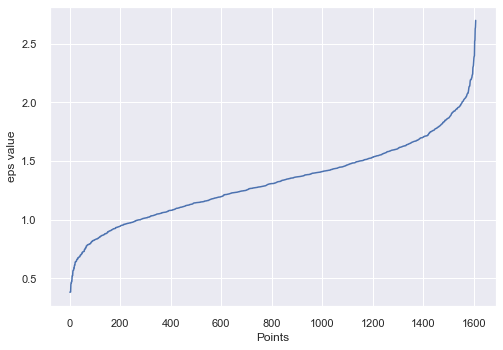

<Figure size 576x396 with 0 Axes>

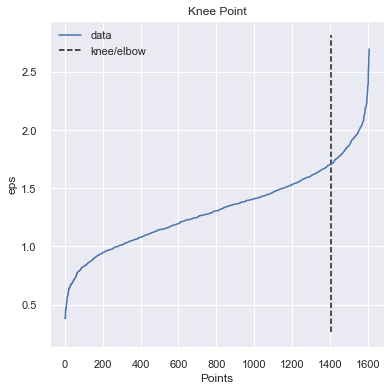

In [3]:
native.DBSCAN_eps(list_18)

Optimal eps value:  2.8286139904049534


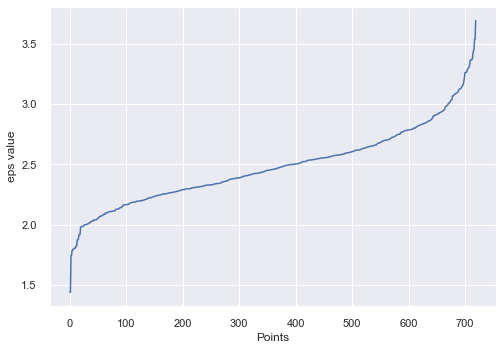

<Figure size 576x396 with 0 Axes>

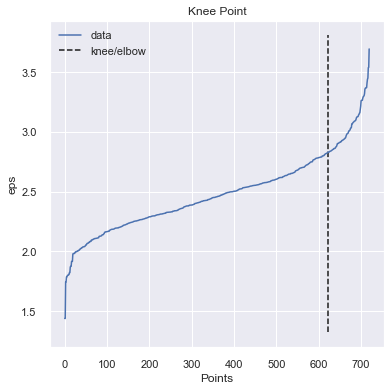

In [4]:
native.DBSCAN_eps(list_25) 

As seen in the very similar graphs and as indicated by the knee method, an optimal eps is around 1.9 for 18S and 2.8 for 25S.

Min_samples can be estimated to be around 1/20 of the total data points. For 18S this is ~ 90 and for 25S ~ 40

Plotting with selected parameters (purple is noise):

In 18S, applies 2 colors to the dataset, but looking at the labels_ array, all points are classified as -1: as noise. It identifies no clusters, regardless of how low the min_samples value is set.

Estimated number of clusters:  0


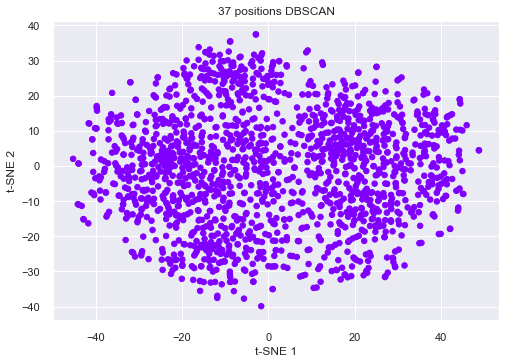

In [5]:
#18S
native.plot_tSNE_reads_covering_positions_data(list_18, 'DBSCAN', eps = 1.9, min_samples =90) 

Identifies no clusters either in 25S.

Estimated number of clusters:  0


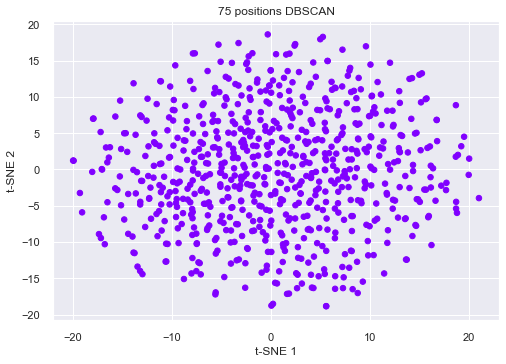

In [6]:
#25S
native.plot_tSNE_reads_covering_positions_data(list_25, 'DBSCAN', eps = 2.8, min_samples = 40) 